In [6]:
!pip install tensorly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import os

In [8]:
fake_1 = pd.read_csv("fake-all-linguistic-psycho.csv")
fake_1.head()

,id,comments,function,pronoun,ppron,i,we,you,shehe,they,...,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male
0,1,It is said that we support the living expenses...,59.75,15.48,6.50,1.86,1.86,1.86,0.0,0.62,...,1.55,0.0,0.0,0.62,0.93,6.81,0.0,0.0,0.0,0.31
1,2,Please clarify the route of the spread as accu...,50.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,5.00,5.0,0.0,0.00,5.00,0.00,0.0,0.0,0.0,0.00
2,3,I'm afraid I'll have to test everyone I've co...,66.67,33.33,25.00,25.00,0.00,0.00,0.0,0.00,...,0.00,0.0,0.0,0.00,0.00,8.33,0.0,0.0,0.0,0.00
3,4,I think it would be better for everyone to wa...,62.50,25.00,12.50,6.25,0.00,0.00,0.0,6.25,...,0.00,0.0,0.0,0.00,0.00,12.50,0.0,0.0,0.0,0.00
4,5,There is no wind. There are foreign workers i...,54.29,8.57,5.71,0.00,0.00,0.00,0.0,5.71,...,0.00,0.0,0.0,0.00,0.00,8.57,0.0,0.0,0.0,0.00


In [9]:
fake_1 = fake_1.drop(fake_1.columns[[0,1]], axis=1)
#fake_1 = fake_1.drop(labels=['socrefs','ppron','discrep','Social','Clout'], axis=1)
fake_1.head()

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,...,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male
0,59.75,15.48,6.50,1.86,1.86,1.86,0.0,0.62,8.98,18.58,...,1.55,0.0,0.0,0.62,0.93,6.81,0.0,0.0,0.0,0.31
1,50.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,15.00,...,5.00,5.0,0.0,0.00,5.00,0.00,0.0,0.0,0.0,0.00
2,66.67,33.33,25.00,25.00,0.00,0.00,0.0,0.00,8.33,0.00,...,0.00,0.0,0.0,0.00,0.00,8.33,0.0,0.0,0.0,0.00
3,62.50,25.00,12.50,6.25,0.00,0.00,0.0,6.25,12.50,12.50,...,0.00,0.0,0.0,0.00,0.00,12.50,0.0,0.0,0.0,0.00
4,54.29,8.57,5.71,0.00,0.00,0.00,0.0,5.71,2.86,11.43,...,0.00,0.0,0.0,0.00,0.00,8.57,0.0,0.0,0.0,0.00


## Preprocessing 1 : Removing Near Zero Variance features 

In [10]:
sample_sta = fake_1.describe()
#sample_sta.T.to_excel("sample.xlsx",encoding = 'utf8')
#sample_sta
sample_sta = sample_sta.T
sample_sta.head()

,count,mean,std,min,25%,50%,75%,max
function,608.0,56.201645,10.042253,0.0,50.8525,56.555,61.5400,90.91
pronoun,608.0,12.942878,8.219258,0.0,8.3300,12.500,16.6700,57.14
ppron,608.0,6.400510,6.473220,0.0,0.0000,5.880,9.0675,50.00
i,608.0,2.580181,5.058936,0.0,0.0000,0.000,3.1450,50.00
we,608.0,1.020378,2.823731,0.0,0.0000,0.000,0.6850,25.00


In [11]:
def get_feature_name(frame):
    feature_names = []
    for idx in range(len(frame)):
        feature = frame.iloc[idx]
        #std가 0과 가까우며, 2분위수가 0인 경우
        if int(feature['std']) != 0 :#and int(feature['50%']) != 0 :
            feature_names.append(feature.name)
    return feature_names

In [12]:
remove_std = get_feature_name(sample_sta)
print(get_feature_name(sample_sta))
print("기존 feature의 갯수:",len(sample_sta))
print("전처리 후 feature 갯수:",len(remove_std))
#전처리 후 feature만 포함하는 dataframe
prepro = fake_1[remove_std]

['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'Social', 'socbehav', 'prosocial', 'moral', 'comm', 'socrefs', 'family', 'female', 'male']
기존 feature의 갯수: 56
전처리 후 feature 갯수: 50


## 똑같이 postive에 대해서도 시행

In [13]:
true_1 = pd.read_csv("true-all-linguistic-psycho.csv")
true_1 = true_1.drop(true_1.columns[[0,1]], axis=1)
true_1.head()

,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,...,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male
0,50.00,10.00,10.00,10.00,0.00,0.00,0.0,0.00,0.00,0.00,...,10.00,0.00,0.00,0.00,0.00,10.00,0.00,0.0,0.00,0.0
1,54.17,8.33,0.00,0.00,0.00,0.00,0.0,0.00,8.33,16.67,...,0.00,0.00,0.00,4.17,4.17,4.17,0.00,0.0,0.00,0.0
2,60.69,11.72,4.83,2.07,2.07,0.00,0.0,0.69,6.90,14.48,...,0.69,0.00,1.38,0.00,0.00,4.14,0.00,0.0,0.00,0.0
3,51.17,8.88,2.80,1.17,0.00,0.93,0.0,0.47,6.07,13.32,...,0.00,0.23,0.00,1.17,1.64,5.37,0.47,0.0,0.23,0.0
4,50.00,14.00,10.00,4.00,2.00,0.00,0.0,0.00,4.00,10.00,...,2.00,0.00,0.00,0.00,0.00,10.00,0.00,0.0,0.00,0.0


In [14]:
true_1_sta = true_1.describe().T
true_remove_sta = get_feature_name(true_1_sta)
print(true_remove_sta)
print("feature 갯수: ",len(true_remove_sta))

['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'Social', 'socbehav', 'prosocial', 'conflict', 'moral', 'comm', 'socrefs', 'male']
feature 갯수:  50


In [15]:
#negative와의 비교
print("negative : ",remove_std)
print("-"*50)
print("positive : ",true_remove_sta)
print("-"*50)
print("겹치는 항목 : ",set(remove_std).intersection(set(true_remove_sta)))
print("겹치는 항목 갯수 : ",len(set(remove_std).intersection(set(true_remove_sta))))
print("-"*50)
print("Negative - Positive : ",set(remove_std).difference(set(true_remove_sta)))
print("-"*50)
print("Positive - Negative : ",set(true_remove_sta).difference(set(remove_std)))

negative :  ['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'Social', 'socbehav', 'prosocial', 'moral', 'comm', 'socrefs', 'family', 'female', 'male']
--------------------------------------------------
positive :  ['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'det', 'article', 'number', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'affiliation', 'achieve', 'power', 'Cognition', 'allnone', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certitude', 'differ', 'Affect', 'tone_pos', 'tone_neg', 'emotion', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_s

In [16]:
#겹치는 항목 feature를 list로 저장
inter = list(set(remove_std).intersection(set(true_remove_sta)))
#negative와 positive의 feature를 intersection기준으로 맞추기
neg_inter = fake_1[inter]
pos_inter = true_1[inter]

## Preprocessing 2 : Feature Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pos_inter = scaler.fit_transform(pos_inter)
neg_inter = scaler.fit_transform(neg_inter)

## PARAFAC2 decomposition 수행

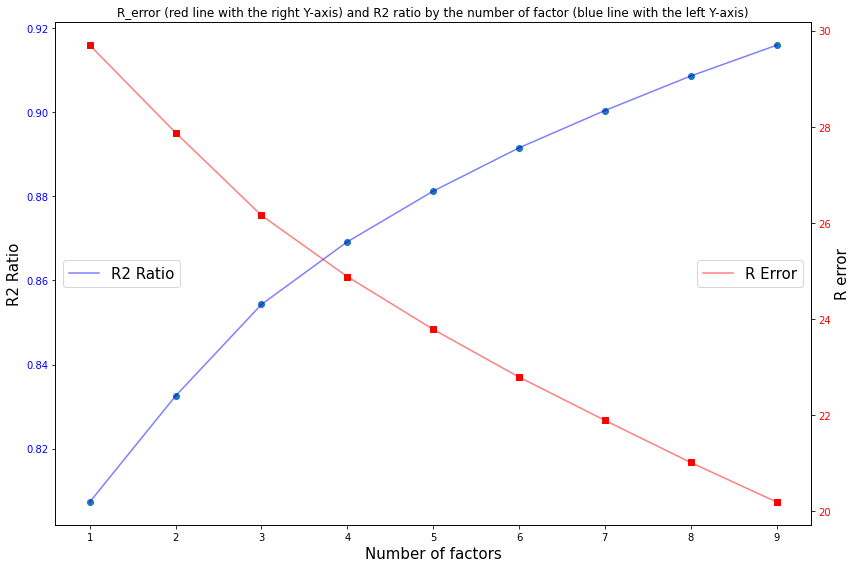

In [20]:
# PARAFAC2 구현 생략
# 그래프로 살펴본 뒤, 적절한 Rank값 설정하기
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title("R_error (red line with the right Y-axis) and R2 ratio by the number of factor (blue line with the left Y-axis)")
ax1.set_xlabel("Number of factors",fontsize = 15)
ax1.set_ylabel("R2 Ratio",fontsize=15)
ax1.scatter(rank_his[:10],r2_ratio[:10])
lns1 = ax1.plot(rank_his,r2_ratio,alpha = 0.5,color=  'blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("R error",fontsize = 15)
ax2.scatter(rank_his,r_error,marker = 's',color = 'red')
lns2 = ax2.plot(rank_his,r_error,alpha = 0.5,color = 'red')
ax2.tick_params(axis = 'y',labelcolor = 'red')

ax1.legend(['R2 Ratio'],fontsize = 15,loc = 'center left')
ax2.legend(['R Error'],fontsize = 15,loc = 'center right')
fig.tight_layout()
plt.show()

##SELECT Optimal Rank r

In [21]:
#Select Optimal Rank r
#Suppose we choose optimal rank 7 (그래프를 보고 결정)
optimal_rank = 7

#Get R^2 ratio & R_error
#||X^||^2 / ||X||^2
print("R^2 ratio : ",round((la.norm(np.concatenate([estimated_tensor[0],estimated_tensor[1][:608]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)),4))
#||X-X^||
print("R_error : ",round((np.sum((t[0]-estimated_tensor[0])**2) + np.sum((t[1]-estimated_tensor[1][:608])**2))**0.5,4))

R^2 ratio :  0.8107
R_error :  21.892


##Calculate Euclidean Distance

In [22]:
def strength_dist(comp_B,comp_C):
    #구현과정 생략
    return result

##Result

In [23]:
#위에서 구현한 함수를 이용하여 distance를 구하기
final = strength_dist(e_C.T,e_A.T)

#make dataframe
#51개의 feature와 위에서 구한 distance를 positive와 negative로 나누어서 최종 결과물로 만들기
df = pd.DataFrame({"feature name" : inter,"Positive": final[:,0],"Negative" : final[:,1],"Difference":(final[:,0]-final[:,1])})
#엑셀 파일로 저장하기
#df.to_excel('final_test_2.xlsx',encoding ='utf8')

df

,feature name,Positive,Negative,Difference
0,Cognition,3.420306,3.910790,-0.490483
1,emotion,2.926165,2.876628,0.049537
2,adverb,2.319887,2.166040,0.153848
3,conj,3.299454,3.368349,-0.068895
4,pronoun,3.622423,3.460803,0.161620
5,discrep,2.599330,2.567440,0.031890
6,number,2.740200,2.535313,0.204888
7,achieve,2.737206,2.614643,0.122562
8,prep,3.251085,2.969318,0.281767
9,emo_neg,3.008191,2.941181,0.067009
